19.504347826086956


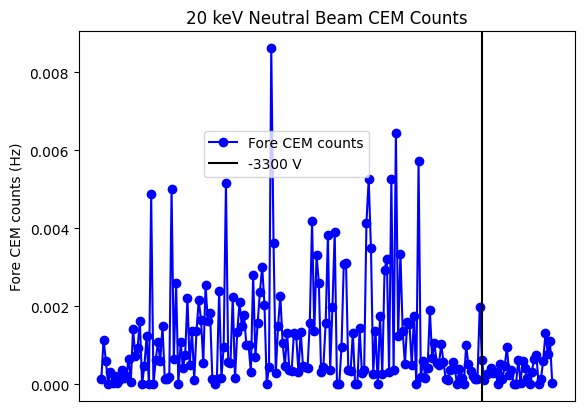

997.3238095238097
314.25208333333336
148.48115942028983


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the file number of interest
file_number = 8

# Read the CSV file
file_path = f'ESA HVPS logs/Daniel-Neutral-ABM-Counts_2024.03.30_{file_number}.csv'
df = pd.read_csv(file_path, skiprows=0)
#volt = df['ESA (V)'].values[:501]
cutoff= 200
fore = df['Aft Rate'].values[:cutoff]
aft = df['Fore Rate'].values[:cutoff]
coin = df['COIN Rate'].values[:cutoff]
time = np.arange(0,len(aft),1)

mean_value_hi = df['Aft Rate'].iloc[154:238].mean()
mean_value_mid = df['Aft Rate'].iloc[15:63].mean()
mean_value_lo = df['Aft Rate'].iloc[69:138].mean()
print(df['Fore Rate'].iloc[69:138].mean())

eff = coin**2/(fore*aft)
#plt.plot(time, fore, linestyle='-', marker='o', color='b', markeredgecolor='blue', markerfacecolor='b', label='Fore CEM counts')
plt.plot(time, eff, linestyle='-', marker='o', color='b', markeredgecolor='blue', markerfacecolor='b', label='Fore CEM counts')

#plt.plot(time, aft, linestyle='-', marker='o', color='g', markeredgecolor='green', markerfacecolor='g', label='Aft CEM counts')
#plt.axhline(y=mean_value_hi, color='red', linestyle='--', label='HC normal')
#plt.axhline(y=mean_value_mid, color='red', linestyle='-.', label='HC off')
#plt.axhline(y=mean_value_lo, color='red', linestyle=':', label='HC polarity reversed')
plt.axvline(x=168, color='black', linestyle='-', label='-3300 V')

plt.gca().axes.get_xaxis().set_visible(False)

plt.ylabel('Fore CEM counts (Hz)')
plt.title('20 keV Neutral Beam CEM Counts')
plt.legend(loc='upper right', bbox_to_anchor=(.6, .75))
plt.show()
mean_value = df['Aft Rate'].iloc[69:138].mean()
print(mean_value_hi)
print(mean_value_mid)
print(mean_value_lo)

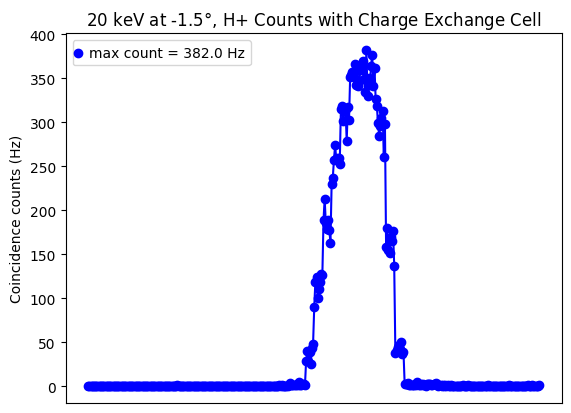

252.54761904761904
0.0625
0.18985507246376812


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the file number of interest
file_number = 7

# Read the CSV file
file_path = f'ESA HVPS logs/Daniel-Ion-ABM-Counts_2024.03.30_{file_number}.csv'
df = pd.read_csv(file_path, skiprows=0)
coin = df['COIN Rate']
time = np.arange(0,len(coin),1)

max_coin = df['COIN Rate'].max()

plt.plot(time, coin, linestyle='-', marker='o', color='b', markeredgecolor='blue', markerfacecolor='b')
plt.legend(['max count = ' + str(max_coin) + ' Hz'], handlelength=0, handleheight=0, loc='upper left')


plt.gca().axes.get_xaxis().set_visible(False)

plt.ylabel('Coincidence counts (Hz)')
plt.title('20 keV at -1.5$\degree$, H+ Counts with Charge Exchange Cell')
#plt.legend(loc='upper left', bbox_to_anchor=(0, .75))
plt.show()
mean_value = df['Aft Rate'].iloc[69:138].mean()
print(mean_value_hi)
print(mean_value_mid)
print(mean_value_lo)


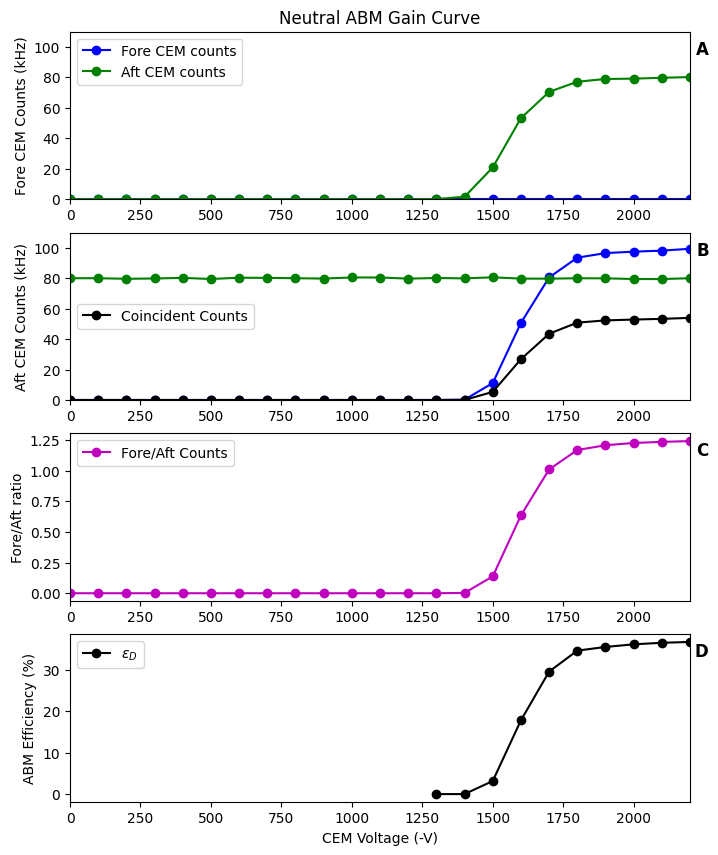

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the file number of interest
file_number = 7

# Read the CSV file
file_path = f'ABM-Counts_2024.03.30_2/HVRAMP_IN-CEM_2024.03.30_{file_number}.csv'
df = pd.read_csv(file_path, skiprows=1)

cutoff = 200
fore = df['IN CEM Rate'][:-1][2:]
aft = df['OUT CEM Rate'][:-1][2:]
Vset = np.arange(0, 2201, 100)

fig, axs = plt.subplots(4, figsize=(8, 10))
axs[0].plot(Vset, aft / 1000, linestyle='-', marker='o', color='b', markeredgecolor='blue', markerfacecolor='b', label='Fore CEM counts')
axs[0].plot(Vset, fore / 1000, linestyle='-', marker='o', color='g', markeredgecolor='green', markerfacecolor='g', label='Aft CEM counts')
axs[0].set_xlim(0, 2200)  # Set x-axis limits
axs[0].set_ylim(0, 110)

file_number2 = 3
# Read the CSV file
file_path = f'ABM-Counts_2024.03.30_2/HVRAMP_OUT-CEM_2024.03.30_{file_number2}.csv'
df = pd.read_csv(file_path, skiprows=1)
fore2 = df['IN CEM Rate'][:-1][2:]
aft2 = df['OUT CEM Rate'][:-1][2:]
coin = df['COIN Rate'][:-1][2:]
Vset = np.arange(0, 2201, 100)

axs[1].plot(Vset, aft2 / 1000, linestyle='-', marker='o', color='b', markeredgecolor='b', markerfacecolor='b')
axs[1].plot(Vset, fore2 / 1000, linestyle='-', marker='o', color='g', markeredgecolor='g', markerfacecolor='g')
axs[1].plot(Vset, coin / 1000, linestyle='-', marker='o', color='black', markeredgecolor='k', markerfacecolor='k', label='Coincident Counts')
axs[1].set_xlim(0, 2200)  # Set x-axis limits
axs[1].set_ylim(0, 110)

axs[2].plot(Vset, aft2 / fore2, linestyle='-', marker='o', color='m', markeredgecolor='m', markerfacecolor='m', label='Fore/Aft Counts')
axs[2].set_xlim(0, 2200)  # Set x-axis limits

axs[3].plot(Vset, coin**2 / (fore2 * aft2)*100, linestyle='-', marker='o', color='k', markeredgecolor='k',label=r'$\varepsilon_D$')
axs[3].set_xlim(0, 2200)  # Set x-axis limits

plt.xlabel('CEM Voltage (-V)')
axs[0].set_ylabel('Fore CEM Counts (kHz)')
axs[1].set_ylabel('Aft CEM Counts (kHz)')
axs[2].set_ylabel('Fore/Aft ratio')
axs[3].set_ylabel('ABM Efficiency (%)')
axs[0].set_title('Neutral ABM Gain Curve')
axs[0].legend()
axs[1].legend(loc='center left', bbox_to_anchor=(0, 0.5))
axs[2].legend()
axs[3].legend()

# Adding labels to subplots
labels = ['A', 'B', 'C', 'D']
for i, ax in enumerate(axs):
    ax.text(1.03, 0.95, labels[i], transform=ax.transAxes, ha='right', va='top', fontsize=12, fontweight='bold', color='k')

plt.grid(False)
plt.show()


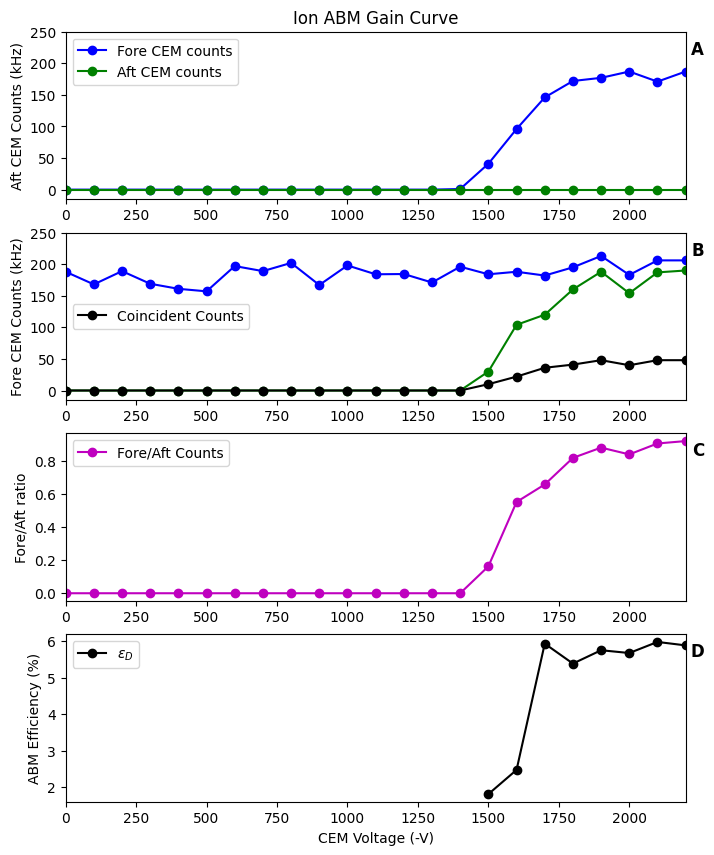

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the file number of interest
file_number = 2

# Read the CSV file
file_path = f'ABM-Counts_2024.03.30_2/HVRAMP_IN-CEM_2024.03.30_{file_number}.csv'
df = pd.read_csv(file_path, skiprows=1)

cutoff = 200
aft = df['IN CEM Rate'][:-1][2:]
fore = df['OUT CEM Rate'][:-1][2:]
Vset = np.arange(0, 2201, 100)

fig, axs = plt.subplots(4, figsize=(8, 10))
axs[0].plot(Vset, aft, linestyle='-', marker='o', color='b', markeredgecolor='blue', markerfacecolor='b', label='Fore CEM counts')
axs[0].plot(Vset, fore, linestyle='-', marker='o', color='g', markeredgecolor='green', markerfacecolor='g', label='Aft CEM counts')

axs[0].set_xlim(0, 2200)  # Set x-axis limits
axs[0].set_ylim(-15, 250)
axs[0].set_ylabel('Aft CEM Counts (kHz)')  # Set label for y-axis

file_number2 = 3
# Read the CSV file
file_path = f'ABM-Counts_2024.03.30_2/HVRAMP_IN-CEM_2024.03.30_{file_number2}.csv'
df = pd.read_csv(file_path, skiprows=1)
fore2 = df['IN CEM Rate'][:-1][2:]
aft2 = df['OUT CEM Rate'][:-1][2:]
coin = df['COIN Rate'][:-1][2:]
Vset = np.arange(0, 2201, 100)


axs[1].plot(Vset, aft2, linestyle='-', marker='o', color='b', markeredgecolor='b', markerfacecolor='b')
axs[1].plot(Vset, fore2, linestyle='-', marker='o', color='g', markeredgecolor='g', markerfacecolor='g')
axs[1].plot(Vset, coin,  linestyle='-', marker='o', color='black', markeredgecolor='k', markerfacecolor='k', label='Coincident Counts')
axs[1].set_xlim(0, 2200)  # Set x-axis limits
axs[1].set_ylim(-15, 250)
axs[1].set_ylabel('Fore CEM Counts (kHz)')  # Set label for y-axis

axs[2].plot(Vset, (aft2 / fore2)**-1, linestyle='-', marker='o', color='m', markeredgecolor='m', markerfacecolor='m', label='Fore/Aft Counts')
axs[2].set_xlim(0, 2200)  # Set x-axis limits
axs[2].set_ylabel('Fore/Aft ratio')  # Set label for y-axis

axs[3].plot(Vset, coin**2 / (fore2 * aft2)*100, linestyle='-', marker='o', color='k', markeredgecolor='k',label=r'$\varepsilon_D$')
axs[3].set_xlim(0, 2200)  # Set x-axis limits
axs[3].set_ylabel('ABM Efficiency (%)')  # Set label for y-axis

plt.xlabel('CEM Voltage (-V)')
axs[0].set_title('Ion ABM Gain Curve')
axs[0].legend()
axs[1].legend(loc='center left', bbox_to_anchor=(0, 0.5))
axs[2].legend()
axs[3].legend()

# Adding labels to the right-hand y-axis
labels = ['A', 'B', 'C', 'D']
for i, ax in enumerate(axs):
     ax.text(1.03, 0.95, labels[i], transform=ax.transAxes, ha='right', va='top', fontsize=12, fontweight='bold', color='k')

plt.grid(False)
plt.show()



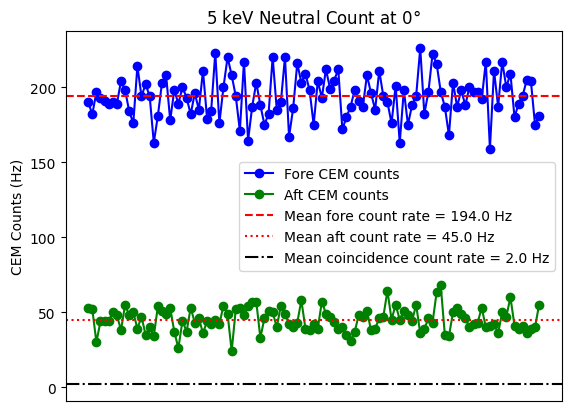

45.833333333333336


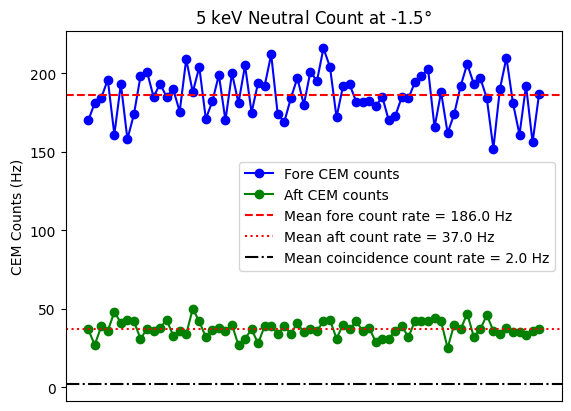

37.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the file numbers of interest
file_numbers = np.arange(2, 4)

for file_number in file_numbers:
    # Read the CSV file
    file_path = f'ESA HVPS logs/Daniel-Neutral-ABM-Counts_2024.03.30_{file_number}.csv'
    df = pd.read_csv(file_path, skiprows=0)
    cutoff = 112
    fore = df['Aft Rate'].values[:cutoff]
    aft = df['Fore Rate'].values[:cutoff]
    foremean = round(df['Aft Rate'].values[:cutoff].mean(),0)
    aftmean = round(df['Fore Rate'].values[:cutoff].mean(),0)
    coinmean = round(df['COIN Rate'].values[:cutoff].mean(),0)
    time = np.arange(0, len(aft), 1)

    plt.plot(time, fore, linestyle='-', marker='o', color='b', markeredgecolor='blue', markerfacecolor='b', label='Fore CEM counts')
    plt.plot(time, aft, linestyle='-', marker='o', color='g', markeredgecolor='green', markerfacecolor='g', label='Aft CEM counts')
    plt.axhline(y=foremean, color='red', linestyle='--', label=f'Mean fore count rate = {foremean} Hz')
    plt.axhline(y=aftmean, color='red', linestyle=':', label=f'Mean aft count rate = {aftmean} Hz')
    plt.axhline(y=coinmean, color='k', linestyle='-.', label=f'Mean coincidence count rate = {coinmean} Hz')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.ylabel('CEM Counts (Hz)')
    
    # Set title based on file number
    if file_number == 2:
        plt.title('5 keV Neutral Count at 0$\degree$')
    elif file_number == 3:
        plt.title('5 keV Neutral Count at -1.5$\degree$')
    
    plt.legend()
    plt.show()

    print(df['Fore Rate'].iloc[69:138].mean())

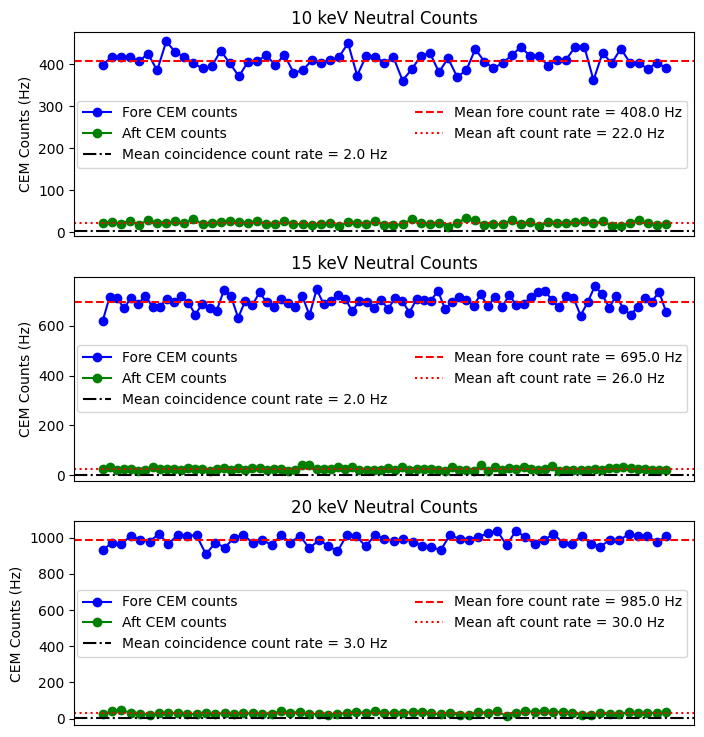

[5 6 7]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the file numbers of interest
file_numbers = np.arange(5, 8)

# Define labels for the y-axis
y_labels = ['10 keV Neutral Counts', '15 keV Neutral Counts', '20 keV Neutral Counts']
plt.figure(figsize=(8, 9))
for idx, file_number in enumerate(file_numbers):
    # Read the CSV file
    file_path = f'ESA HVPS logs/Daniel-Neutral-ABM-Counts_2024.03.30_{file_number}.csv'
    df = pd.read_csv(file_path, skiprows=0)
    cutoff = 112
    fore = df['Aft Rate'].values[:cutoff]
    aft = df['Fore Rate'].values[:cutoff]
    foremean = round(df['Aft Rate'].values[:cutoff].mean(),0)
    aftmean = round(df['Fore Rate'].values[:cutoff].mean(),0)
    coinmean = round(df['COIN Rate'].values[:cutoff].mean(),0)
    time = np.arange(0, len(aft), 1)

    plt.subplot(3, 1, idx+1)  # Create subplot
    plt.plot(time, fore, linestyle='-', marker='o', color='b', markeredgecolor='blue', markerfacecolor='b', label='Fore CEM counts')
    plt.plot(time, aft, linestyle='-', marker='o', color='g', markeredgecolor='green', markerfacecolor='g', label='Aft CEM counts')
    plt.axhline(y=coinmean, color='k', linestyle='-.', label=f'Mean coincidence count rate = {coinmean} Hz')
    plt.axhline(y=foremean, color='red', linestyle='--', label=f'Mean fore count rate = {foremean} Hz')
    plt.axhline(y=aftmean, color='red', linestyle=':', label=f'Mean aft count rate = {aftmean} Hz')
    
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.ylabel('CEM Counts (Hz)')
    plt.title(y_labels[idx])  # Set title based on file number
    plt.legend()
    plt.legend(ncol=2)

plt.xlabel('Time')  # Add x-axis label to the last subplot
plt.show()

print(file_numbers)